<center>
<h1>Fake news detection using graph neural network</h1>
<h2>Graph Attention Network (GAT) GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all, val_step, train_all_optuna
from torch_geometric.nn import GATConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('./data/datasets.pkl', 'rb'))

# Define the model

In [5]:
class GAT(torch.nn.Module):
    
    def __init__(self, num_n_feature, num_g_feature, emb_size):
        super(GAT, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.in_gat1_layer = GATConv(num_n_feature, emb_size, dropout = 0.25)
        self.gat2 = GATConv(emb_size, emb_size, dropout = 0.25)

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)

    def forward(self, x, edges_idx, batch_idx, g_features):

        x = self.in_gat1_layer(x, edges_idx)

        x = self.gat2(x, edges_idx)

        flatten = torch.cat([global_mean_pool(x, batch_idx),
                             global_max_pool(x, batch_idx)], axis=1)
        
        if g_features.size()[-1]>1:
            g_ft = self.lin_g(g_features)
            flatten = torch.cat([flatten, g_ft], axis=1)

        out = self.act(self.out_layer(flatten))

        return out

# Training

In [6]:
epochs = 60     
models = train_all_optuna(GAT,datasets,epochs = epochs)

[I 2022-01-02 20:37:53,149] A new study created in memory with name: no-name-d9b80e8a-6fe2-416c-bf2a-9ee793fbfc19


--> Train on: origin


[I 2022-01-02 20:41:33,350] Trial 0 finished with value: 0.8659811580882353 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.8659811580882353.
[I 2022-01-02 20:42:50,094] Trial 1 finished with value: 0.9140625 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 1 with value: 0.9140625.
[I 2022-01-02 20:44:31,131] Trial 2 finished with value: 0.7196691176470589 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 1 with value: 0.9140625.
[I 2022-01-02 20:45:53,732] Trial 3 finished with value: 0.7072610294117647 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 1 with value: 0.9140625.
[I 2022-01-02 20:48:51,702] Trial 4 finished with value: 0.8573529411764707 and parameters: {'le

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.33327271938323977  loss_val=0.31491785248120624 | acc_train=0.8604319852941176  acc_val=0.8657322303921569
Epochs: 20 | loss_train=0.2597779929637909  loss_val=0.2777198255062103 | acc_train=0.8732996323529412  acc_val=0.8878676470588235
Epochs: 30 | loss_train=0.2612221598625183  loss_val=0.27484675745169324 | acc_train=0.8829044117647058  acc_val=0.8838848039215685
Epochs: 40 | loss_train=0.2513266235589981  loss_val=0.21317637960116068 | acc_train=0.9034466911764707  acc_val=0.9198069852941176
Epochs: 50 | loss_train=0.22863344848155975  loss_val=0.22408355275789896 | acc_train=0.9006893382352942  acc_val=0.9034926470588235
Epochs: 60 | loss_train=0.2118809014558792  loss_val=0.21032160023848215 | acc_train=0.9181066176470589  acc_val=0.9394148284313726


[I 2022-01-02 21:09:01,098] A new study created in memory with name: no-name-7d287f03-fc77-4005-9b93-6f27b8521da4


--> Train on: dataset1


[I 2022-01-02 21:09:47,541] Trial 0 finished with value: 0.8252910539215685 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8252910539215685.
[I 2022-01-02 21:11:18,817] Trial 1 finished with value: 0.8228975183823529 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.8252910539215685.
[I 2022-01-02 21:12:17,294] Trial 2 finished with value: 0.8415096507352942 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 60}. Best is trial 2 with value: 0.8415096507352942.
[I 2022-01-02 21:15:08,965] Trial 3 finished with value: 0.8855698529411764 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 160}. Best is trial 3 with value: 0.8855698529411764.
[I 2022-01-02 21:16:51,230] Trial 4 finished with value: 0.7

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=1.7490735451380413  loss_val=1.882922112941742 | acc_train=0.7927389705882352  acc_val=0.525390625
Epochs: 20 | loss_train=0.7332359453042349  loss_val=0.5981539189815521 | acc_train=0.7060738357843137  acc_val=0.8288143382352942
Epochs: 30 | loss_train=1.5410418311754863  loss_val=1.0699366629123688 | acc_train=0.681640625  acc_val=0.8278377757352942
Epochs: 40 | loss_train=0.4403105080127716  loss_val=0.411287397146225 | acc_train=0.7900965073529411  acc_val=0.8659811580882353
Epochs: 50 | loss_train=0.3332495093345642  loss_val=0.4270209074020386 | acc_train=0.8445159313725491  acc_val=0.8092256433823529
Epochs: 60 | loss_train=0.3642449180285136  loss_val=0.2778661549091339 | acc_train=0.8549708946078431  acc_val=0.8855698529411764


[I 2022-01-02 21:28:18,453] A new study created in memory with name: no-name-03e55b33-8956-4011-bf22-689fd917222a


--> Train on: dataset2


[I 2022-01-02 21:29:04,637] Trial 0 finished with value: 0.8381433823529412 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.01, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8381433823529412.
[I 2022-01-02 21:30:25,477] Trial 1 finished with value: 0.8742340686274509 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.8742340686274509.
[I 2022-01-02 21:32:11,949] Trial 2 finished with value: 0.8709214154411764 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.8742340686274509.
[I 2022-01-02 21:32:58,273] Trial 3 finished with value: 0.8507199754901961 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 1 with value: 0.8742340686274509.
[I 2022-01-02 21:35:03,204] Trial 4 finished with value: 0.844

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.39630328946643406  loss_val=0.39180460572242737 | acc_train=0.8222017973856208  acc_val=0.8420955882352942
Epochs: 20 | loss_train=0.34314297801918453  loss_val=0.29001258313655853 | acc_train=0.8737745098039216  acc_val=0.8729779411764707
Epochs: 30 | loss_train=0.2691441807481978  loss_val=0.309168940782547 | acc_train=0.8818933823529412  acc_val=0.8768382352941175
Epochs: 40 | loss_train=0.2680142538415061  loss_val=0.28612917065620425 | acc_train=0.8954758986928104  acc_val=0.8721507352941176
Epochs: 50 | loss_train=0.28764674067497253  loss_val=0.2698208689689636 | acc_train=0.8813316993464052  acc_val=0.8889705882352942
Epochs: 60 | loss_train=0.2797697087128957  loss_val=0.2342471808195114 | acc_train=0.878216911764706  acc_val=0.8936580882352942


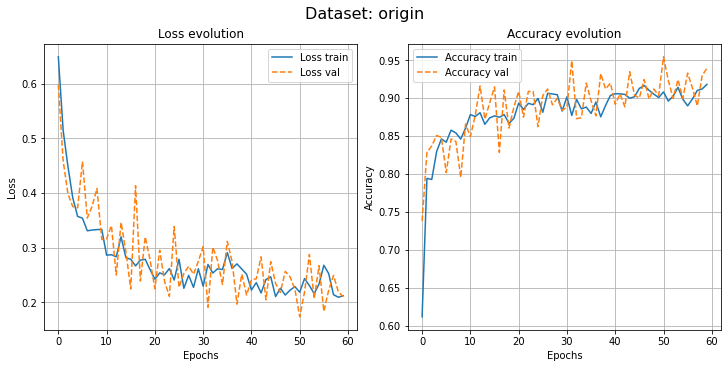

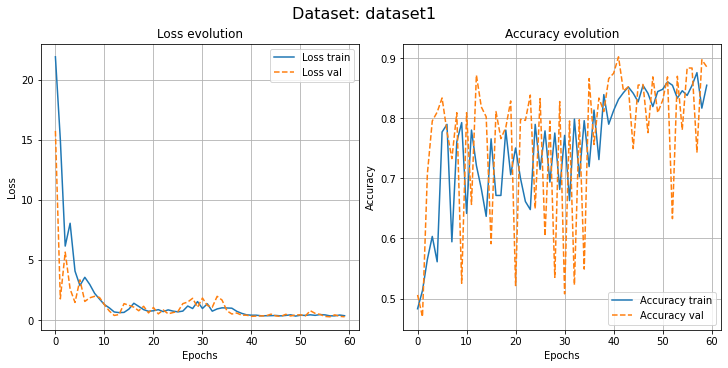

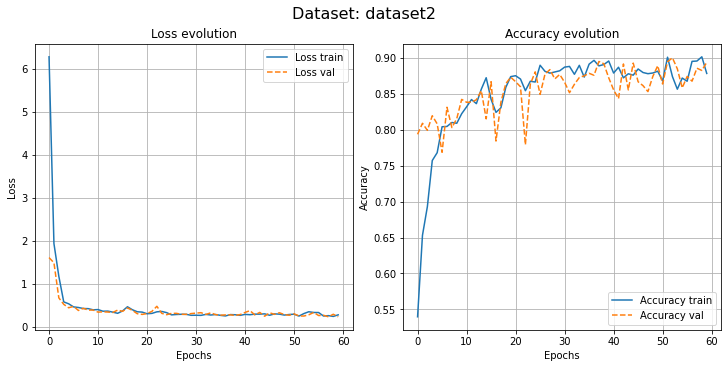

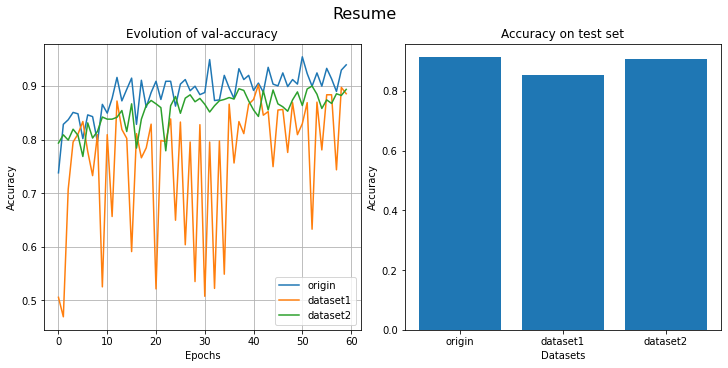

In [7]:
plot_hist(models)